In [525]:
import imageio
import pylab

from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
pd.set_option('mode.chained_assignment', None)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

import numpy as np
from numpy import linalg as LA
from numpy.linalg import inv, lstsq

import seaborn as sns
from datetime import datetime

import scipy
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats
from scipy.stats.mstats import winsorize

from random import *

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, scale, RobustScaler
from sklearn import preprocessing
from sklearn import cross_validation, metrics 
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.grid_search import GridSearchCV   #Perforing grid search



from xgboost import XGBClassifier

import xgboost as xgb


import statsmodels.api as sm
from math import sqrt
from sklearn.metrics import mean_squared_error

from sklearn.decomposition import PCA


import csv 


from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Dropout
from keras import optimizers



# DATA EXPLORATION

In [675]:
train_raw = pd.read_csv("train_final.csv", index_col=0)
train_raw = train_raw.drop(['F25', 'F26', 'F27'], axis=1)
#train_raw


In [3]:
# print(train_raw['Y'].mean())
for col in train_raw:
    print(col)
    print(train_raw[col].unique())

Y
[1 0]
F1
[38733 34248 15830 ..., 42856 82990 76722]
F2
[61385 51329  5522 ...,  4980  6228 74783]
F3
[0 1 2 7 4 3 5]
F4
[38 41 50 45 43 40 44 48 47 42 39 29 36 37 35 31 34 46 32 33 25 56 52 30 27
 51 55 49 28 53 54 58 22 26 24 23 57 21 59]
F5
[118751 120800 118779 123163 119193 120061 120822 120064 119650 119622
 119558 161531 120970 119657 119797 120381 119147 121693 123002 119868
 122467 120771 119515 119917 120570 120236 121706 137573 121174 119630
 120607 122057 119576 119132 122434 119203 127829 119684 120065 120722
 119325 120528 120228 120312 125414 124789 121593 121825 120824 120634
 121888 123840 118759 120685 120038 122516 260178 138892 119296 120281
 120656 119715 120429 119167 120386 119707 120521 119441 124826 122391
 122696 121645 124810 121217 119190 124722 120835 119640 122734 119853
 118771 120585 120739 255267 121877 119620 122088 126543 118926 121177
 119736 120491 120074 123142 120578 122016 127537 122287 120306 120724
 119785 129590 122322 118844 119608 129102 12

In [4]:
print(train_raw['F11'].value_counts())
print(train_raw['F20'].value_counts())

1     15761
2       519
3        79
4        14
5         4
6         2
8         2
7         1
10        1
Name: F11, dtype: int64
1     15779
2       521
3        69
4        10
5         3
12        1
Name: F20, dtype: int64


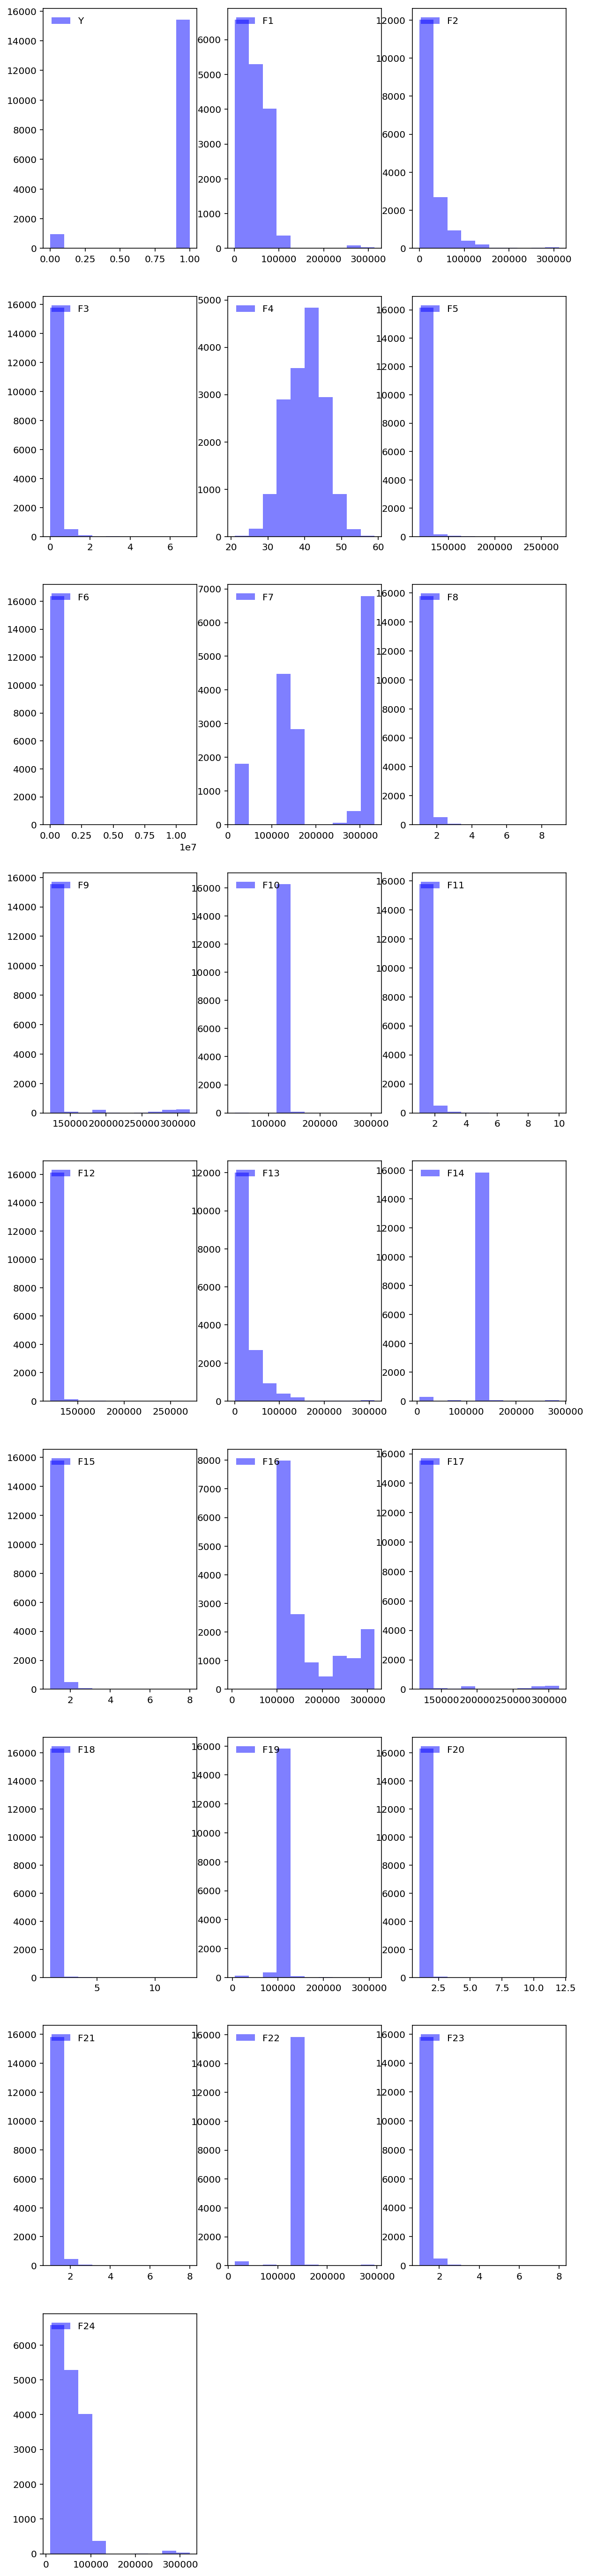

In [5]:
# Generically define how many plots along and across
ncols = 3
nrows = int(np.ceil(len(train_raw.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 50))

# Lazy counter so we can remove unwated axes
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(train_raw.columns):

            ax.hist(train_raw[train_raw.columns[counter]], bins=10, color='blue', alpha=0.5, label='{}'.format(train_raw.columns[counter]))
            #ax.set_xlabel('x')
            #ax.set_ylabel('PDF')
            #ax.set_ylim([0, 5])
            leg = ax.legend(loc='upper left')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

In [227]:
print(train_raw['F1'].min())
print(train_raw['F1'].max())

print(train_raw['F2'].min())
print(train_raw['F2'].max())

print(train_raw['F5'].min())
print(train_raw['F5'].max())

print(train_raw['F9'].min())
print(train_raw['F9'].max())

print(train_raw['F10'].min())
print(train_raw['F10'].max())

print(train_raw['F14'].min())
print(train_raw['F14'].max())

999
314150
43
311733
118751
269481
121980
317189
33778
306789
4745
286934


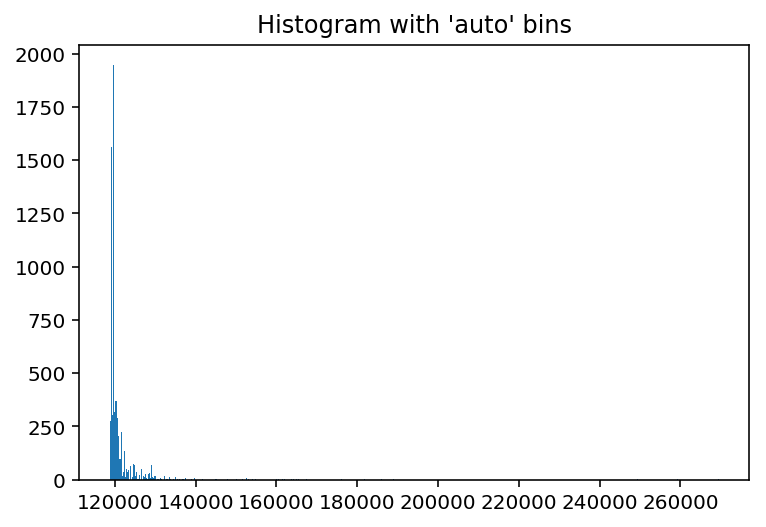

In [232]:
plt.hist(train_raw['F5'], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

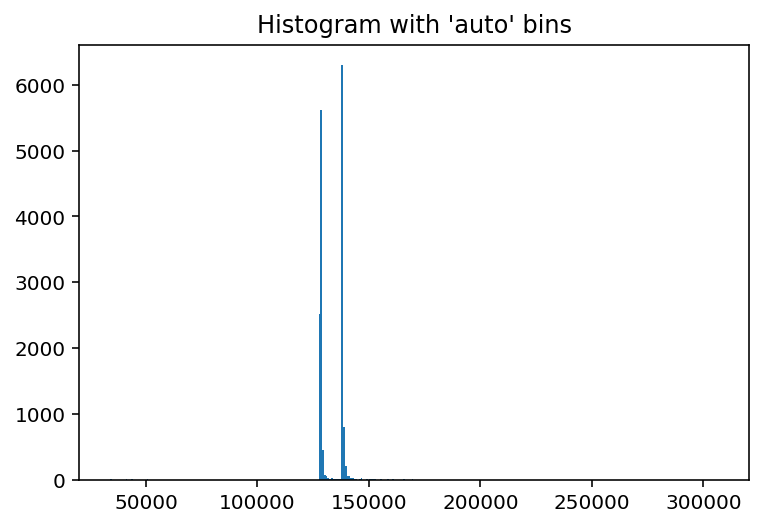

In [233]:
plt.hist(train_raw['F10'], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [259]:
arr1 = np.array(train_raw['F10'])
count = 0
for ind in range(0, arr1.size):
    if abs(arr1[ind] - arr1.mean()) > arr1.std():
        print ind, arr1[ind]
        count+=1
print(count)

12 139690
62 51008
110 179714
153 150598
173 41009
175 148798
208 51008
276 139690
283 146917
336 145098
395 146917
397 146917
409 141784
454 141784
577 169715
652 155247
667 155247
668 139919
673 169715
727 153008
737 148798
740 161174
777 147043
787 141011
864 158797
958 140214
1117 141011
1174 139919
1210 148798
1301 161109
1305 141011
1401 158797
1482 152838
1516 158797
1517 141004
1580 150598
1618 155247
1696 150598
1714 33778
1728 139919
1740 140863
1790 146973
1797 140139
1855 140684
1888 139834
1919 143328
1932 41009
2022 33778
2025 140863
2204 140863
2256 141784
2282 141004
2328 140882
2332 139621
2404 140863
2477 140341
2504 151852
2592 146973
2694 146973
2717 139919
2734 140139
2749 141784
2761 140341
2815 140863
3100 151175
3111 41009
3125 140341
3154 140860
3176 139621
3183 141853
3197 41009
3215 140863
3217 142972
3229 142531
3282 144033
3357 144033
3448 140844
3464 141517
3558 147043
3602 139919
3639 139919
3689 139834
3693 142531
3723 41009
3809 140139
3846 41009
3848 1

In [533]:
print arr1.mean()
arr1 = np.array(train_raw['F10'])
count = 0
for ind in range(0, arr1.size):
    if arr1[ind] > 175000:
        print ind, arr1[ind], "a"
        count+=1
    if arr1[ind] < 125000:
        print ind, arr1[ind], "b"
        count+=1      
print(count)

132923.113593
62 51008 b
110 179714 a
173 41009 b
208 51008 b
1714 33778 b
1932 41009 b
2022 33778 b
3111 41009 b
3197 41009 b
3723 41009 b
3846 41009 b
4082 33778 b
4204 43777 b
4553 41009 b
4727 33778 b
4836 43777 b
7294 33778 b
8129 51008 b
8164 41009 b
8184 51008 b
10033 51008 b
10138 41009 b
10523 41009 b
10928 51008 b
11481 51008 b
13326 43777 b
13493 41009 b
14118 306789 a
14498 41009 b
15412 41009 b
15518 33778 b
15738 33778 b
16343 205840 a
33


In [254]:
count = 0
arr2 = np.array(train_raw['F5'])
for ind in range(0, arr2.size):
    if abs(arr2[ind] - arr2.mean()) > arr2.std():
        print ind, arr2[ind]
        count += 1
print count

12 161531
32 137573
47 127829
89 260178
90 138892
143 255267
172 127537
181 129590
191 129102
206 129973
214 134179
221 128596
250 128260
281 127693
306 150210
310 127981
319 127495
387 127537
425 130647
431 127537
439 129102
440 129973
481 129070
488 127011
523 129102
551 131305
624 128654
634 127537
681 129102
698 155701
769 129590
777 135390
795 136682
824 129102
827 129636
902 129102
911 127556
937 132223
939 129973
956 129102
979 129102
995 129636
996 128427
1055 126958
1083 133565
1117 139712
1149 132223
1154 164603
1165 134179
1174 129973
1231 127137
1242 129837
1250 130166
1266 127556
1281 133742
1292 131653
1299 127556
1302 129102
1337 131305
1347 132668
1374 130507
1389 127537
1419 127537
1426 164603
1444 128427
1454 134179
1480 128427
1486 138444
1520 129102
1534 185147
1541 130102
1592 129467
1606 132600
1619 142591
1620 129973
1728 129973
1732 159162
1733 129973
1751 134590
1790 134436
1792 150789
1801 133565
1822 140838
1824 131352
1831 135050
1836 138841
1846 130102
1860

In [255]:
count = 0
arr2 = np.array(train_raw['F5'])
for ind in range(0, arr2.size):
    if abs(arr2[ind] - arr2.mean()) > arr2.std():
        if abs(arrr[ind] - 132923) > 6684:
            print ind, arr2[ind]
            count +=1
print count

12 161531
777 135390
1117 139712
1174 129973
1728 129973
1790 134436
1919 132380
2025 186018
3448 127829
5568 129973
5573 129837
5869 126915
6579 129973
6637 128564
7518 141709
8875 129837
9243 188911
11755 159103
12100 176135
12597 176135
14160 130095
14699 129973
16246 129837
23


In [676]:
F25 = 1
train_raw_ones = train_raw.copy(deep=True)
train_raw_ones['ONES'] = F25
#train_raw_ones_col = train_raw_ones.columns
#train_raw_ones

In [7]:
y = train_raw_ones['Y']
X = train_raw_ones.drop(['Y'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [678]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.548
Date:                Wed, 21 Mar 2018   Prob (F-statistic):             0.0643
Time:                        19:40:13   Log-Likelihood:                 496.72
No. Observations:               10976   AIC:                            -955.4
Df Residuals:                   10957   BIC:                            -816.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
F1             0.0002      0.002      0.098      0.9

In [9]:
prediction = np.matmul(X_test, results.params)
print (roc_auc_score(y_test, prediction))

0.509719737276


### standardization

In [10]:
y = train_raw['Y']
X = train_raw.drop(['Y'], axis = 1)
X_col = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = X_col)

F25 = 1
X['ones'] = F25
X


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F16,F17,F18,F19,F20,F21,F22,F23,F24,ones
0,-0.160254,0.989123,-0.174001,-0.400691,-0.394364,-0.046879,-1.684821,-0.173416,-0.276906,-0.742600,...,-0.760193,-0.276906,-0.165442,0.056362,-0.173744,-0.161232,-0.059196,-0.171408,-0.160254,1
1,-0.289080,0.707771,-0.174001,0.199448,-0.041259,-0.046879,-0.705864,-0.173416,-0.211104,-0.685306,...,-0.495634,-0.211104,-0.165442,0.056544,-0.173744,-0.161232,0.142314,-0.171408,-0.289080,1
2,-0.818116,-0.573842,-0.174001,1.999866,-0.389539,-0.046879,1.007515,3.839408,-0.276071,-0.691738,...,-0.759905,-0.276071,-0.165442,0.056544,-0.173744,3.564378,-0.027564,-0.171408,-0.818116,1
3,-0.715084,-0.539372,-0.174001,0.999634,0.365957,-0.037987,-1.813839,-0.173416,-0.135251,-0.741254,...,1.414747,-0.135251,-0.165442,0.056544,-0.173744,-0.161232,-5.901498,-0.171408,-0.715084,1
4,-0.062909,-0.252956,-0.174001,0.199448,-0.318194,-0.046879,1.007515,-0.173416,-0.262711,-0.691738,...,-0.759905,-0.262711,-0.165442,0.056544,-0.173744,-0.161232,0.310194,-0.171408,-0.062909,1
5,1.051433,-0.141182,-0.174001,0.599541,-0.168611,-0.037987,-0.585015,-0.173416,-0.223596,0.806443,...,0.171220,-0.223596,-0.165442,0.167695,-0.173744,-0.161232,0.246352,-0.171408,1.051433,1
6,-0.817513,0.764484,-0.174001,-0.000598,-0.037468,-0.046879,1.007515,-0.173416,-0.210430,-0.742301,...,-0.584344,-0.210430,-0.165442,0.056544,-0.173744,-0.161232,0.166905,-0.171408,-0.817513,1
7,-0.057911,-0.598071,-0.174001,0.799587,-0.389539,-0.046879,1.007515,-0.173416,-0.276071,-0.685306,...,-0.759905,-0.276071,-0.165442,0.056544,-0.173744,-0.161232,0.049835,-0.171408,-0.057911,1
8,0.992808,0.454230,-0.174001,1.599773,-0.168094,-0.037987,1.129614,-0.173416,-0.223500,0.808088,...,-0.732934,-0.223500,-0.165442,0.135574,3.824072,-0.161232,-0.011748,-0.171408,0.992808,1
9,-1.109836,-0.645355,3.380432,-0.000598,-0.239439,-0.046879,1.182786,-0.173416,-0.248067,-0.689345,...,1.568656,-0.248067,-0.165442,0.088664,-0.173744,-0.161232,5.568251,-0.171408,-1.109836,1


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [14]:
y_train = list(y_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.481
Date:                Fri, 16 Mar 2018   Prob (F-statistic):             0.0811
Time:                        15:57:46   Log-Likelihood:                 496.86
No. Observations:               10976   AIC:                            -953.7
Df Residuals:                   10956   BIC:                            -807.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
F1             0.0001      0.001      0.093      0.9

In [15]:
prediction = np.matmul(X_test, results.params)
y_test  = np.array(y_test)
prediction = np.array(prediction)
print(type(y_test))
print(y_test)
print (roc_auc_score(y_test, (prediction)))

<type 'numpy.ndarray'>
[1 1 1 ..., 1 1 1]
0.509719737276


In [17]:
# works but slow


# import sympy 
# _, inds = sympy.Matrix(X).rref()
# inds
#  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 17, 18, 19, 20, 22, 24]


In [18]:
arrX = X.as_matrix()
arrX.shape

(16383, 25)

In [19]:
for i in range(arrX.shape[1]):
    for j in range(arrX.shape[1]):
        if i != j:
            inner_product = np.inner(
                arrX[:,i],
                arrX[:,j]
            )
            norm_i = np.linalg.norm(arrX[:,i])
            norm_j = np.linalg.norm(arrX[:,j])

            print 'I: ', i, arrX[:,i]
            print 'J: ', j, arrX[:,j]
            print 'Prod: ', inner_product
            print 'Norm i: ', norm_i
            print 'Norm j: ', norm_j
            if np.abs(inner_product - norm_j * norm_i) < 1E-5:
                print 'Dependenta'
            else:
                print 'Independent'

I:  0 [-0.16025378 -0.28908029 -0.81811633 ..., -1.10983584  0.93093691
  0.93604976]
J:  1 [ 0.98912325  0.70777108 -0.57384179 ..., -0.25421498 -0.59600079
 -0.59597281]
Prod:  345.671042934
Norm i:  127.99609369
Norm j:  127.99609369
Independent
I:  0 [-0.16025378 -0.28908029 -0.81811633 ..., -1.10983584  0.93093691
  0.93604976]
J:  2 [-0.17400081 -0.17400081 -0.17400081 ..., -0.17400081 -0.17400081
 -0.17400081]
Prod:  26.4915218775
Norm i:  127.99609369
Norm j:  127.99609369
Independent
I:  0 [-0.16025378 -0.28908029 -0.81811633 ..., -1.10983584  0.93093691
  0.93604976]
J:  3 [-0.4006912   0.19944812  1.9998661  ..., -1.00083053  0.19944812
  0.79958745]
Prod:  220.479713558
Norm i:  127.99609369
Norm j:  127.99609369
Independent
I:  0 [-0.16025378 -0.28908029 -0.81811633 ..., -1.10983584  0.93093691
  0.93604976]
J:  4 [-0.394364   -0.04125923 -0.38953875 ..., -0.31819401  0.49968557
  0.03060251]
Prod:  160.636583598
Norm i:  127.99609369
Norm j:  127.99609369
Independent
I:  

### when standardized, it is clear that there are linear pairs F1-F24, F2-F13, F5-F12, F9-F17, F14-F22.  I removed the later of each pair

In [20]:
X_slimmed = X.copy(deep=True)

X_slimmed = X_slimmed.drop(['F24', 'F13', 'F12', 'F17', 'F22'], axis=1)

# take out the ones that are noise
#X_slimmed = X_slimmed.drop(['F1', 'F2','F11', 'F18', 'F20'], axis=1)

### 1 and 2 are iffy.  I might try to take out outliers before removing 1 worse 2 better with just 11 out
# taking out 20 is much worse


X_slimmed = X_slimmed.drop(['F11'], axis=1)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_slimmed, y, test_size=0.33, random_state=42)


In [22]:
y_train = list(y_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.548
Date:                Fri, 16 Mar 2018   Prob (F-statistic):             0.0643
Time:                        15:57:48   Log-Likelihood:                 496.72
No. Observations:               10976   AIC:                            -955.4
Df Residuals:                   10957   BIC:                            -816.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
F1             0.0002      0.002      0.098      0.9

In [23]:
prediction = np.matmul(X_test, results.params)
y_test  = np.array(y_test)
prediction = np.array(prediction)
print(type(y_test))
print(y_test)
print (roc_auc_score(y_test, (prediction)))

<type 'numpy.ndarray'>
[1 1 1 ..., 1 1 1]
0.510323579265


# logistic regression


In [24]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
print(logisticRegr.coef_)

[[ 0.00306171 -0.00847311 -0.03348407  0.07333381  0.11387177  0.45467788
  -0.03191215 -0.0318647  -0.03733687 -0.09940796 -0.06740736  0.03199435
   0.0691478   0.01489599 -0.05799669  0.02114469  0.08145806  0.04505009
   1.41932421]]


In [25]:
prediction = np.matmul(X_test, logisticRegr.coef_[0])
print (roc_auc_score(y_test, (prediction)))

0.519233485569


In [26]:
logit = sm.Logit(y_train, X_train)
#lresult = logit.fit(method='bfgs', maxiter=50)
result = logit.fit()
#result.summary()
result.params

Optimization terminated successfully.
         Current function value: 0.216765
         Iterations 10


F1      0.002975
F2     -0.008614
F3     -0.033579
F4      0.073616
F5      0.114987
F6      0.545610
F7     -0.031951
F8     -0.031986
F9     -0.037553
F10    -0.099728
F14    -0.067603
F15     0.032098
F16     0.069398
F18     0.014945
F19    -0.058292
F20     0.021332
F21     0.082042
F23     0.045283
ones    2.843702
dtype: float64

In [27]:
prediction = np.matmul(X_test, result.params)
y_test  = np.array(y_test)
prediction = np.array(prediction)
print (roc_auc_score(y_test, (prediction)))

0.520121003814


In [30]:
# sketchy AF https://github.com/statsmodels/statsmodels/issues/3931
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [679]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10976
Model:                          Logit   Df Residuals:                    10957
Method:                           MLE   Df Model:                           18
Date:                Wed, 21 Mar 2018   Pseudo R-squ.:                0.006644
Time:                        19:43:04   Log-Likelihood:                -2379.2
converged:                       True   LL-Null:                       -2395.1
                                        LLR p-value:                   0.02305
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
F1             0.0030      0.041      0.072      0.942      -0.078       0.084
F2            -0.0086      0.041     -0.210      0.834      -0.089       0.072
F3            -0.0336      0.037     -0.911      0.3

# MODELS

### XGBOOST

In [93]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)

In [106]:
pred = bst.predict(dtest)
print (roc_auc_score(y_test, (pred)))

0.725539985404


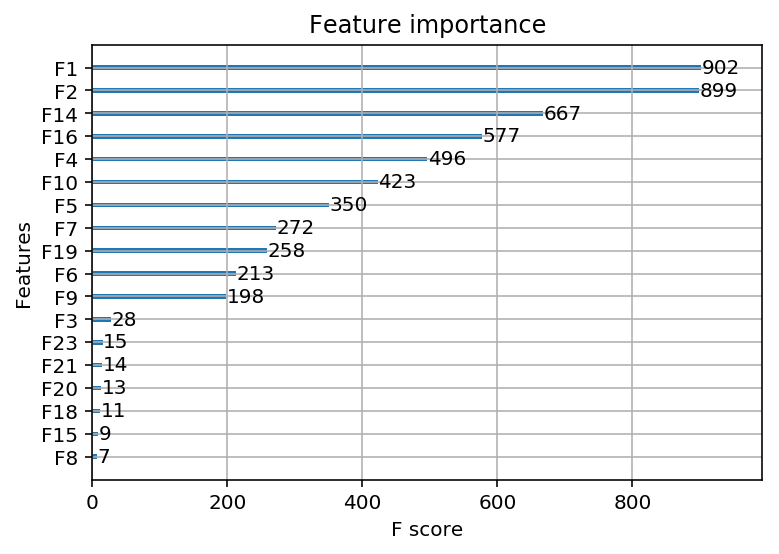

In [107]:
xgb.plot_importance(bst)


### XGB Model Tuning

In [593]:
train = pd.read_csv("train_final.csv", index_col=0)
train = train.drop(['F25', 'F26', 'F27'], axis=1)

train = train.drop(['F24', 'F13', 'F12', 'F17', 'F22'], axis=1)

target = 'Y'

test = pd.read_csv("test_final.csv", index_col=0)

test = test.drop(['F24', 'F13', 'F12', 'F17', 'F22'], axis=1)



borrowed from this method
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [670]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Y'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    #print(dtrain_predictions)
    
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['Y'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Y'], dtrain_predprob)
                    
# #     feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')


    #dtest = xgb.DMatrix(testX)
#     pred1 = alg.predict_proba(test_clip)[:, 1]
#     print(pred1)
#     pred1 = pd.DataFrame(pred1, index = test_clip.index, columns = ['Y'])
#     pred1.to_csv('test_clip02.csv')


#     pred1 = alg.predict_proba(testRobust)[:, 1]
#     print(pred1)
#     pred1 = pd.DataFrame(pred1, index = test.index, columns = ['Y'])
#     pred1.to_csv('test_robust02.csv')

#     pred1 = alg.predict_proba(Etestwin)[:, 1]
#     print(pred1)
#     pred1 = pd.DataFrame(pred1, index = test.index, columns = ['Y'])
#     pred1.to_csv('test_Ewin03.csv')
    

In [681]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)


Model Report
Accuracy : 0.9749
AUC Score (Train): 0.995417
[ 0.95382971  0.77057451  0.969675   ...,  0.8121261   0.99239784
  0.95410329]


In [198]:
xgb1.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 492,
 'nthread': 4,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 27,
 'silent': 1,
 'subsample': 0.8}

In [199]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=492, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.73727, std: 0.00615, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.73687, std: 0.00799, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.73228, std: 0.00803, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.74747, std: 0.00580, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.74800, std: 0.00703, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.74668, std: 0.00880, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.75210, std: 0.01155, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.74514, std: 0.00511, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.75146, std: 0.00503, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.74965, std: 0.00644, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.75402, std: 0.00655, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.74912, std: 0.00525, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 9, 'min_child_weight': 3

In [203]:
param_test2 = {
 'max_depth':[8,9,10],
 'min_child_weight':[2,3,4]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=492, max_depth=9,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.74550, std: 0.00653, params: {'max_depth': 8, 'min_child_weight': 2},
  mean: 0.74967, std: 0.00579, params: {'max_depth': 8, 'min_child_weight': 3},
  mean: 0.75001, std: 0.00473, params: {'max_depth': 8, 'min_child_weight': 4},
  mean: 0.74639, std: 0.00454, params: {'max_depth': 9, 'min_child_weight': 2},
  mean: 0.75402, std: 0.00655, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.74973, std: 0.00338, params: {'max_depth': 9, 'min_child_weight': 4},
  mean: 0.75311, std: 0.00803, params: {'max_depth': 10, 'min_child_weight': 2},
  mean: 0.74827, std: 0.00840, params: {'max_depth': 10, 'min_child_weight': 3},
  mean: 0.74697, std: 0.00849, params: {'max_depth': 10, 'min_child_weight': 4}],
 {'max_depth': 9, 'min_child_weight': 3},
 0.7540156439940147)

In [201]:
param_test2b = {
 'max_depth':[10,11,12,15]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=2, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_depth': [10, 11, 12, 15]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='roc_auc', verbose=0)

In [202]:
gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_


([mean: 0.75848, std: 0.00685, params: {'max_depth': 10},
  mean: 0.75434, std: 0.00473, params: {'max_depth': 11},
  mean: 0.75783, std: 0.00980, params: {'max_depth': 12},
  mean: 0.75731, std: 0.00957, params: {'max_depth': 15}],
 {'max_depth': 10},
 0.7584847673667026)

In [208]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=9,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, train, predictors)


Model Report
Accuracy : 0.9482
AUC Score (Train): 0.968914
[ 0.97242457  0.70904946  0.97030926 ...,  0.85690314  0.97437072
  0.97406298]


In [209]:
xgb2.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 9,
 'min_child_weight': 3,
 'missing': None,
 'n_estimators': 64,
 'nthread': 4,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 27,
 'silent': 1,
 'subsample': 0.8}

In [210]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=64, max_depth=9,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.74653, std: 0.00980, params: {'gamma': 0.0},
  mean: 0.75073, std: 0.00953, params: {'gamma': 0.1},
  mean: 0.74518, std: 0.01028, params: {'gamma': 0.2},
  mean: 0.74168, std: 0.01220, params: {'gamma': 0.3},
  mean: 0.74640, std: 0.00710, params: {'gamma': 0.4}],
 {'gamma': 0.1},
 0.7507314527205178)

### my parameter testing

In [211]:
param_test1 = {
 'max_depth':range(5,15,3),
 'n_estimators':range(50, 200, 50)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=492, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.71061, std: 0.01705, params: {'n_estimators': 50, 'max_depth': 5},
  mean: 0.72431, std: 0.01097, params: {'n_estimators': 100, 'max_depth': 5},
  mean: 0.73350, std: 0.00949, params: {'n_estimators': 150, 'max_depth': 5},
  mean: 0.73656, std: 0.01014, params: {'n_estimators': 50, 'max_depth': 8},
  mean: 0.74823, std: 0.00631, params: {'n_estimators': 100, 'max_depth': 8},
  mean: 0.75205, std: 0.00596, params: {'n_estimators': 150, 'max_depth': 8},
  mean: 0.74930, std: 0.00919, params: {'n_estimators': 50, 'max_depth': 11},
  mean: 0.75218, std: 0.00644, params: {'n_estimators': 100, 'max_depth': 11},
  mean: 0.75311, std: 0.00586, params: {'n_estimators': 150, 'max_depth': 11},
  mean: 0.75534, std: 0.00561, params: {'n_estimators': 50, 'max_depth': 14},
  mean: 0.75807, std: 0.00657, params: {'n_estimators': 100, 'max_depth': 14},
  mean: 0.75280, std: 0.00569, params: {'n_estimators': 150, 'max_depth': 14}],
 {'max_depth': 14, 'n_estimators': 100},
 0.758065913434803)

In [212]:
param_test1 = {
 'max_depth':[12,13,14,15],
 'n_estimators':range(75, 200, 25)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=492, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.75195, std: 0.00857, params: {'n_estimators': 75, 'max_depth': 12},
  mean: 0.75265, std: 0.00890, params: {'n_estimators': 100, 'max_depth': 12},
  mean: 0.75286, std: 0.00891, params: {'n_estimators': 125, 'max_depth': 12},
  mean: 0.75199, std: 0.00984, params: {'n_estimators': 150, 'max_depth': 12},
  mean: 0.75203, std: 0.00853, params: {'n_estimators': 175, 'max_depth': 12},
  mean: 0.75496, std: 0.00277, params: {'n_estimators': 75, 'max_depth': 13},
  mean: 0.75330, std: 0.00129, params: {'n_estimators': 100, 'max_depth': 13},
  mean: 0.75367, std: 0.00242, params: {'n_estimators': 125, 'max_depth': 13},
  mean: 0.75377, std: 0.00085, params: {'n_estimators': 150, 'max_depth': 13},
  mean: 0.75284, std: 0.00189, params: {'n_estimators': 175, 'max_depth': 13},
  mean: 0.75659, std: 0.00685, params: {'n_estimators': 75, 'max_depth': 14},
  mean: 0.75807, std: 0.00657, params: {'n_estimators': 100, 'max_depth': 14},
  mean: 0.75413, std: 0.00550, params: {'n_estimators':

In [213]:
param_test2 = {
 'min_child_weight':[1,2,3,4]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=100, max_depth=14,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.75807, std: 0.00657, params: {'min_child_weight': 1},
  mean: 0.76011, std: 0.00555, params: {'min_child_weight': 2},
  mean: 0.75750, std: 0.00711, params: {'min_child_weight': 3},
  mean: 0.75056, std: 0.00308, params: {'min_child_weight': 4}],
 {'min_child_weight': 2},
 0.7601076696746778)

In [217]:
xgb4 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=14,
 min_child_weight=2,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, train, predictors)


Model Report
Accuracy : 0.9786
AUC Score (Train): 0.999053
[ 0.93892127  0.77061653  0.97205001 ...,  0.93625116  0.98268789
  0.97868526]


In [218]:
xgb4.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 14,
 'min_child_weight': 2,
 'missing': None,
 'n_estimators': 100,
 'nthread': 4,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 27,
 'silent': 1,
 'subsample': 0.8}

In [219]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=14,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.76011, std: 0.00555, params: {'gamma': 0.0},
  mean: 0.75806, std: 0.00558, params: {'gamma': 0.1},
  mean: 0.75725, std: 0.00646, params: {'gamma': 0.2},
  mean: 0.75393, std: 0.00557, params: {'gamma': 0.3},
  mean: 0.75794, std: 0.00611, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 0.7601076696746778)

In [230]:
param_test4 = {
 'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=14,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.66123, std: 0.03109, params: {'learning_rate': 0.0001},
  mean: 0.66987, std: 0.03082, params: {'learning_rate': 0.001},
  mean: 0.73351, std: 0.02325, params: {'learning_rate': 0.01},
  mean: 0.76011, std: 0.00555, params: {'learning_rate': 0.1},
  mean: 0.74546, std: 0.00848, params: {'learning_rate': 0.2},
  mean: 0.74523, std: 0.00869, params: {'learning_rate': 0.3}],
 {'learning_rate': 0.1},
 0.7601076696746778)

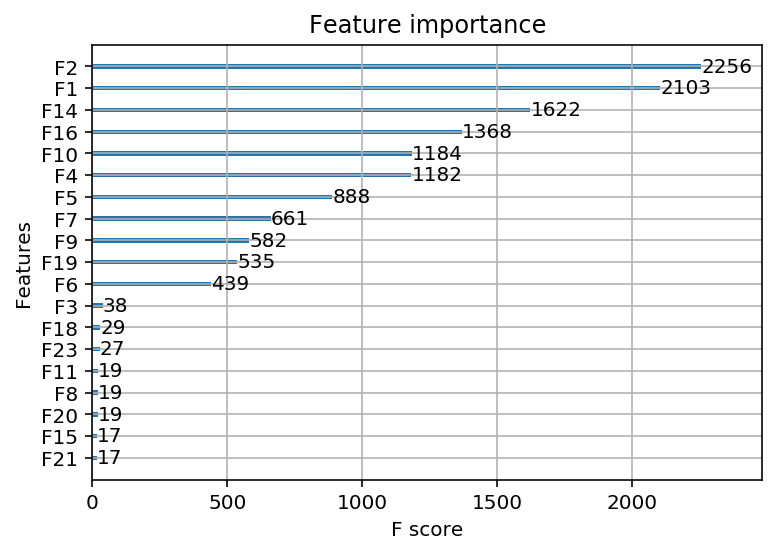

In [231]:
xgb.plot_importance(xgb4)

### tried dropping outliers on F10

In [269]:
train_clip = pd.read_csv("train_final.csv", index_col=0)
train_clip = train_clip.drop(['F25', 'F26', 'F27'], axis=1)

train_clip = train_clip.drop(['F24', 'F13', 'F12', 'F17', 'F22'], axis=1)

target_clip = 'Y'

In [270]:
#print arr1.mean()
arr1 = np.array(train_raw['F10'])
count = 0
for ind in range(0, arr1.size):
    if arr1[ind] > 175000:
        train_clip = train_clip.drop(ind, axis = 0)
        #print ind, arr1[ind]
        count+=1
    if arr1[ind] < 125000:
        train_clip = train_clip.drop(ind, axis = 0)
        #print ind, arr1[ind]
        count+=1      
print(count)



33


In [273]:
xgb_clip = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=14,
 min_child_weight=2,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb_clip, train_clip, predictors)


Model Report
Accuracy : 0.981
AUC Score (Train): 0.999394
[ 0.96522474  0.63471943  0.96771741 ...,  0.87870532  0.98548788
  0.96805531]


In [275]:
xgb_clip.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 14,
 'min_child_weight': 2,
 'missing': None,
 'n_estimators': 100,
 'nthread': 4,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 27,
 'silent': 1,
 'subsample': 0.8}

In [277]:
param_testd = {
 'learning_rate':[0.1]
}
gsearchd = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=14,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_testd, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearchd.fit(train_clip[predictors],train_clip[target])
gsearchd.grid_scores_, gsearchd.best_params_, gsearchd.best_score_

([mean: 0.75291, std: 0.00629, params: {'learning_rate': 0.1}],
 {'learning_rate': 0.1},
 0.7529081942057205)

In [ ]:
 0.7601076696746778)


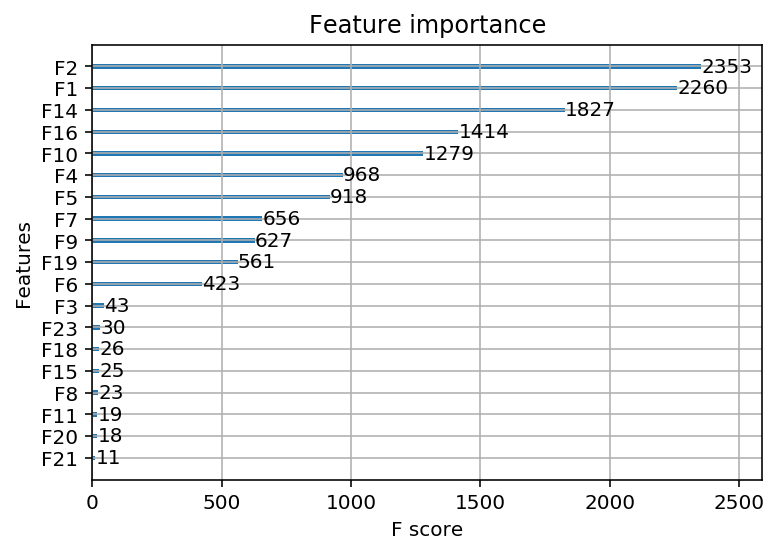

In [278]:
xgb.plot_importance(xgb_clip)

### tried dropping F21

In [287]:
train_clip = pd.read_csv("train_final.csv", index_col=0)
train_clip = train_clip.drop(['F25', 'F26', 'F27'], axis=1)

train_clip = train_clip.drop(['F24', 'F13', 'F12', 'F17', 'F22'], axis=1)

train_clip = train_clip.drop(['F21'], axis=1)

target_clip = 'Y'
predictors_clip = [x for x in train_clip.columns if x not in [target]]



test_clip = pd.read_csv("test_final.csv", index_col=0)

test_clip = test_clip.drop(['F24', 'F13', 'F12', 'F17', 'F22'], axis=1)
test_clip = test_clip.drop(['F21'], axis=1)



In [288]:
xgb_clip = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=14,
 min_child_weight=2,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb_clip, train_clip, predictors_clip)


Model Report
Accuracy : 0.9556
AUC Score (Train): 0.991854
[ 0.95284671  0.66278625  0.9413929  ...,  0.79892039  0.95807534
  0.93734932]


In [289]:
xgb_clip.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 14,
 'min_child_weight': 2,
 'missing': None,
 'n_estimators': 46,
 'nthread': 4,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 27,
 'silent': 1,
 'subsample': 0.8}

In [292]:
param_testd = {
 'max_depth':[12,13,14,15],
 'n_estimators':range(75, 200, 25)
}
gsearchd = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=14,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_testd, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearchd.fit(train_clip[predictors_clip],train_clip[target])
gsearchd.grid_scores_, gsearchd.best_params_, gsearchd.best_score_

([mean: 0.75079, std: 0.00923, params: {'n_estimators': 75, 'max_depth': 12},
  mean: 0.75325, std: 0.00498, params: {'n_estimators': 100, 'max_depth': 12},
  mean: 0.75265, std: 0.00408, params: {'n_estimators': 125, 'max_depth': 12},
  mean: 0.75218, std: 0.00406, params: {'n_estimators': 150, 'max_depth': 12},
  mean: 0.75248, std: 0.00391, params: {'n_estimators': 175, 'max_depth': 12},
  mean: 0.75485, std: 0.00280, params: {'n_estimators': 75, 'max_depth': 13},
  mean: 0.75473, std: 0.00362, params: {'n_estimators': 100, 'max_depth': 13},
  mean: 0.75388, std: 0.00413, params: {'n_estimators': 125, 'max_depth': 13},
  mean: 0.75300, std: 0.00497, params: {'n_estimators': 150, 'max_depth': 13},
  mean: 0.75232, std: 0.00433, params: {'n_estimators': 175, 'max_depth': 13},
  mean: 0.75458, std: 0.00790, params: {'n_estimators': 75, 'max_depth': 14},
  mean: 0.75411, std: 0.00651, params: {'n_estimators': 100, 'max_depth': 14},
  mean: 0.75341, std: 0.00546, params: {'n_estimators':

In [ ]:
 0.7601076696746778)


In [ ]:
xgb.plot_importance(xgb_clip)

### Remove outliers in other ways

In [598]:
scaler = RobustScaler()
testRobust = test.copy(deep=True)
trainRobust = train.copy(deep=True)
robcoltest = testRobust.columns
robcoltrain = trainRobust.columns

In [599]:
testRobust = scaler.fit_transform(testRobust)
testRobust = pd.DataFrame(testRobust, columns = robcoltest)

trainRobust = scaler.fit_transform(trainRobust)
trainRobust = pd.DataFrame(trainRobust, columns = robcoltrain)

In [600]:
trainRobust['Y'] += 1


In [603]:
xgb_robust = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=14,
 min_child_weight=2,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb_robust, trainRobust, predictors)


Model Report
Accuracy : 0.9786
AUC Score (Train): 0.999053
[ 0.93305451  0.92101973  0.97698283 ...,  0.90602779  0.97279358
  0.94655359]


In [523]:
param_testd = {
 'max_depth':[12,13,14,15],
 'n_estimators':range(75, 200, 25)
}
gsearchd = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=14,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_testd, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearchd.fit(trainRobust[predictors],trainRobust[target])
gsearchd.grid_scores_, gsearchd.best_params_, gsearchd.best_score_

([mean: 0.75232, std: 0.01279, params: {'n_estimators': 75, 'max_depth': 12},
  mean: 0.74982, std: 0.01158, params: {'n_estimators': 100, 'max_depth': 12},
  mean: 0.75065, std: 0.01144, params: {'n_estimators': 125, 'max_depth': 12},
  mean: 0.75099, std: 0.01155, params: {'n_estimators': 150, 'max_depth': 12},
  mean: 0.75312, std: 0.00994, params: {'n_estimators': 175, 'max_depth': 12},
  mean: 0.75470, std: 0.00364, params: {'n_estimators': 75, 'max_depth': 13},
  mean: 0.75661, std: 0.00582, params: {'n_estimators': 100, 'max_depth': 13},
  mean: 0.75730, std: 0.00900, params: {'n_estimators': 125, 'max_depth': 13},
  mean: 0.75607, std: 0.00868, params: {'n_estimators': 150, 'max_depth': 13},
  mean: 0.75415, std: 0.00905, params: {'n_estimators': 175, 'max_depth': 13},
  mean: 0.75885, std: 0.00458, params: {'n_estimators': 75, 'max_depth': 14},
  mean: 0.75912, std: 0.00415, params: {'n_estimators': 100, 'max_depth': 14},
  mean: 0.75584, std: 0.00677, params: {'n_estimators':

### Remove outliers via winsorize

In [594]:
testwin = test.copy(deep=True)
trainwin = train.copy(deep=True)
wincoltest = testwin.columns
wincoltrain = trainwin.columns

In [542]:
# test = winsorize(trainwin['F10'], limits=(.002, .001), inplace=False)
# print (test.max())
# print (test.min())
# test = winsorize(trainwin['F5'], limits=(.00, .01), inplace=False)
# print (test.max())
# print (test.min())
# test = winsorize(trainwin['F19'], limits=(.03, .005), inplace=False)
# print (test.max())
# print (test.min())
# print (trainwin['F19'].max())
# print (trainwin['F19'].min())
# plt.hist(test, bins='auto')  # arguments are passed to np.histogram
# plt.title("Histogram with 'auto' bins")
# plt.show()

158797
127876


In [606]:
winsorize(trainwin['F10'], limits=(.002, .001), inplace=True)
winsorize(trainwin['F5'], limits=(.00, .01), inplace=True)
winsorize(trainwin['F19'], limits=(.03, .005), inplace=True)

winsorize(testwin['F10'], limits=(.002, .001), inplace=True)
winsorize(testwin['F5'], limits=(.00, .01), inplace=True)
winsorize(testwin['F19'], limits=(.03, .005), inplace=True)

masked_array(data = [122084 119703 119703 ..., 119703 119541 118832],
             mask = False,
       fill_value = 999999)

In [623]:
xgb_win = XGBClassifier(
 learning_rate =0.1,
 n_estimators=150,
 max_depth=11,
 min_child_weight=2,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb_win, trainwin, predictors, useTrainCV=False)


Model Report
Accuracy : 0.9821
AUC Score (Train): 0.999202
[ 0.96504742  0.87231451  0.98546761 ...,  0.95218825  0.98661101
  0.97410053]


In [624]:
xgb_win.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 11,
 'min_child_weight': 2,
 'missing': None,
 'n_estimators': 150,
 'nthread': 4,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 27,
 'silent': 1,
 'subsample': 0.8}

In [ ]:
param_test1 = {
 'max_depth':range(5,15,3),
 'n_estimators':range(50, 200, 50)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=60, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(trainwin[predictors],trainwin[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

11, 150

In [619]:
param_test1w = {
 'max_depth':[10,11,12,13],
 'n_estimators':range(125, 225, 25)
}
gsearch1w = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=492, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1w, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1w.fit(trainwin[predictors],trainwin[target])
gsearch1w.grid_scores_, gsearch1w.best_params_, gsearch1w.best_score_

([mean: 0.75439, std: 0.00599, params: {'n_estimators': 125, 'max_depth': 10},
  mean: 0.75577, std: 0.00594, params: {'n_estimators': 150, 'max_depth': 10},
  mean: 0.75595, std: 0.00505, params: {'n_estimators': 175, 'max_depth': 10},
  mean: 0.75577, std: 0.00448, params: {'n_estimators': 200, 'max_depth': 10},
  mean: 0.75744, std: 0.00220, params: {'n_estimators': 125, 'max_depth': 11},
  mean: 0.75964, std: 0.00214, params: {'n_estimators': 150, 'max_depth': 11},
  mean: 0.75952, std: 0.00239, params: {'n_estimators': 175, 'max_depth': 11},
  mean: 0.75911, std: 0.00133, params: {'n_estimators': 200, 'max_depth': 11},
  mean: 0.75585, std: 0.01130, params: {'n_estimators': 125, 'max_depth': 12},
  mean: 0.75506, std: 0.01113, params: {'n_estimators': 150, 'max_depth': 12},
  mean: 0.75556, std: 0.01085, params: {'n_estimators': 175, 'max_depth': 12},
  mean: 0.75503, std: 0.01061, params: {'n_estimators': 200, 'max_depth': 12},
  mean: 0.75544, std: 0.00397, params: {'n_estimator

In [625]:
param_test2w = {
 'min_child_weight':[1,2,3,4]
}
gsearch2w = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=150, max_depth=11,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2w, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2w.fit(trainwin[predictors],trainwin[target])
gsearch2w.grid_scores_, gsearch2w.best_params_, gsearch2w.best_score_

([mean: 0.75500, std: 0.00390, params: {'min_child_weight': 1},
  mean: 0.75964, std: 0.00214, params: {'min_child_weight': 2},
  mean: 0.75203, std: 0.00421, params: {'min_child_weight': 3},
  mean: 0.75452, std: 0.00091, params: {'min_child_weight': 4}],
 {'min_child_weight': 2},
 0.7596367257904044)

In [626]:
param_test3w = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3w = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=150, max_depth=11,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3w, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3w.fit(trainwin[predictors],trainwin[target])
gsearch3w.grid_scores_, gsearch3w.best_params_, gsearch3w.best_score_

([mean: 0.75964, std: 0.00214, params: {'gamma': 0.0},
  mean: 0.75303, std: 0.00641, params: {'gamma': 0.1},
  mean: 0.75654, std: 0.00659, params: {'gamma': 0.2},
  mean: 0.75515, std: 0.00740, params: {'gamma': 0.3},
  mean: 0.75350, std: 0.00633, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 0.7596367257904044)

In [628]:
param_test4w = {
 'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
}
gsearch4w = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=150, max_depth=11,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4w, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4w.fit(trainwin[predictors],trainwin[target])
gsearch4w.grid_scores_, gsearch4w.best_params_, gsearch4w.best_score_

([mean: 0.66317, std: 0.02742, params: {'learning_rate': 0.0001},
  mean: 0.67566, std: 0.02733, params: {'learning_rate': 0.001},
  mean: 0.73911, std: 0.02078, params: {'learning_rate': 0.01},
  mean: 0.75964, std: 0.00214, params: {'learning_rate': 0.1},
  mean: 0.74177, std: 0.00824, params: {'learning_rate': 0.2},
  mean: 0.74233, std: 0.00592, params: {'learning_rate': 0.3}],
 {'learning_rate': 0.1},
 0.7596367257904044)

In [629]:
param_test5w = {
 'n_estimators':[135,140,145,150,155,160]
}
gsearch5w = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=150, max_depth=11,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test5w, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5w.fit(trainwin[predictors],trainwin[target])
gsearch5w.grid_scores_, gsearch5w.best_params_, gsearch5w.best_score_

([mean: 0.75771, std: 0.00136, params: {'n_estimators': 135},
  mean: 0.75842, std: 0.00129, params: {'n_estimators': 140},
  mean: 0.75923, std: 0.00197, params: {'n_estimators': 145},
  mean: 0.75964, std: 0.00214, params: {'n_estimators': 150},
  mean: 0.75966, std: 0.00246, params: {'n_estimators': 155},
  mean: 0.75961, std: 0.00304, params: {'n_estimators': 160}],
 {'n_estimators': 155},
 0.7596574037790398)

### more extreme winsorization 

In [654]:
Etestwin = test.copy(deep=True)
Etrainwin = train.copy(deep=True)
Ewincoltest = Etestwin.columns
Ewincoltrain = Etrainwin.columns

In [647]:
testa = winsorize(Etrainwin['F2'], limits=(.00, .01), inplace=False)
print (testa.max())
print (testa.min())

print (Etrainwin['F2'].max())
print (Etrainwin['F2'].min())


148950
43
311733
43


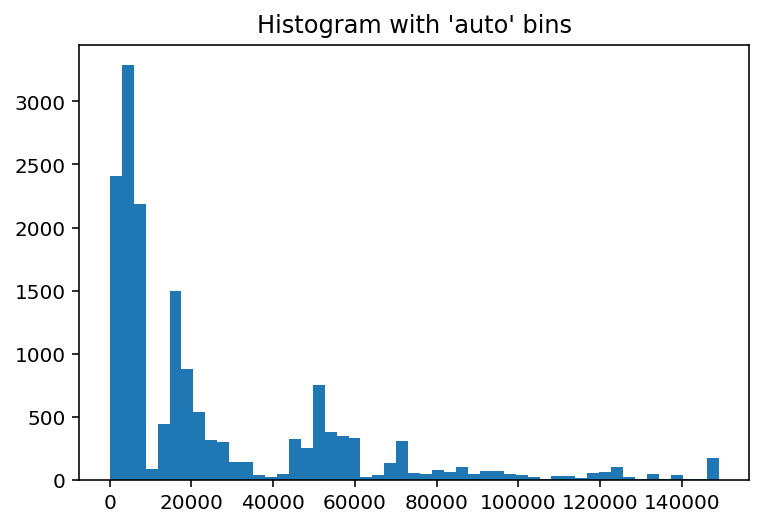

In [661]:
plt.hist(Etrainwin['F2'], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [656]:
Etrainwin['F10'] = winsorize(Etrainwin['F10'], limits=(.002, .001), inplace=True)
Etrainwin['F5'] = winsorize(Etrainwin['F5'], limits=(.00, .01), inplace=True)
Etrainwin['F19'] = winsorize(Etrainwin['F19'], limits=(.03, .005), inplace=True)

Etrainwin['F1'] = winsorize(Etrainwin['F1'], limits=(.00, .01), inplace=True)
Etrainwin['F2'] = winsorize(Etrainwin['F2'], limits=(.00, .01), inplace=False)

Etestwin['F10'] = winsorize(Etestwin['F10'], limits=(.002, .001), inplace=True)
Etestwin['F5'] = winsorize(Etestwin['F5'], limits=(.00, .01), inplace=True)
Etestwin['F19'] = winsorize(Etestwin['F19'], limits=(.03, .005), inplace=True)

Etestwin['F1'] = winsorize(Etestwin['F1'], limits=(.00, .01), inplace=True)
Etestwin['F2']= winsorize(Etestwin['F2'], limits=(.00, .01), inplace=False)

In [671]:
xgb_Ewin = XGBClassifier(
 learning_rate =0.1,
 n_estimators=140,
 max_depth=13,
 min_child_weight=2,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb_Ewin, Etrainwin, predictors, useTrainCV=False)


Model Report
Accuracy : 0.9879
AUC Score (Train): 0.999769
[ 0.96335876  0.80069655  0.96033072 ...,  0.91539556  0.98962176
  0.97226745]


In [660]:
param_test1 = {
 'max_depth':range(5,15,3),
 'n_estimators':range(50, 200, 50)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=60, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(Etrainwin[predictors],Etrainwin[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.71167, std: 0.01525, params: {'n_estimators': 50, 'max_depth': 5},
  mean: 0.72512, std: 0.00985, params: {'n_estimators': 100, 'max_depth': 5},
  mean: 0.73552, std: 0.01021, params: {'n_estimators': 150, 'max_depth': 5},
  mean: 0.74113, std: 0.00873, params: {'n_estimators': 50, 'max_depth': 8},
  mean: 0.75060, std: 0.00566, params: {'n_estimators': 100, 'max_depth': 8},
  mean: 0.75047, std: 0.00368, params: {'n_estimators': 150, 'max_depth': 8},
  mean: 0.75129, std: 0.00926, params: {'n_estimators': 50, 'max_depth': 11},
  mean: 0.75365, std: 0.00811, params: {'n_estimators': 100, 'max_depth': 11},
  mean: 0.75470, std: 0.00751, params: {'n_estimators': 150, 'max_depth': 11},
  mean: 0.75380, std: 0.00754, params: {'n_estimators': 50, 'max_depth': 14},
  mean: 0.75400, std: 0.00778, params: {'n_estimators': 100, 'max_depth': 14},
  mean: 0.75520, std: 0.00553, params: {'n_estimators': 150, 'max_depth': 14}],
 {'max_depth': 14, 'n_estimators': 150},
 0.7551956675545928)

In [668]:
param_test1w = {
 'max_depth':[12,13,14,15],
 'n_estimators':[140,150,160]
}
gsearch1w = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=492, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1w, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1w.fit(Etrainwin[predictors],Etrainwin[target])
gsearch1w.grid_scores_, gsearch1w.best_params_, gsearch1w.best_score_

([mean: 0.75516, std: 0.00396, params: {'n_estimators': 140, 'max_depth': 12},
  mean: 0.75523, std: 0.00492, params: {'n_estimators': 150, 'max_depth': 12},
  mean: 0.75489, std: 0.00435, params: {'n_estimators': 160, 'max_depth': 12},
  mean: 0.75796, std: 0.00869, params: {'n_estimators': 140, 'max_depth': 13},
  mean: 0.75774, std: 0.00829, params: {'n_estimators': 150, 'max_depth': 13},
  mean: 0.75769, std: 0.00842, params: {'n_estimators': 160, 'max_depth': 13},
  mean: 0.75528, std: 0.00661, params: {'n_estimators': 140, 'max_depth': 14},
  mean: 0.75520, std: 0.00553, params: {'n_estimators': 150, 'max_depth': 14},
  mean: 0.75439, std: 0.00460, params: {'n_estimators': 160, 'max_depth': 14},
  mean: 0.75529, std: 0.00599, params: {'n_estimators': 140, 'max_depth': 15},
  mean: 0.75538, std: 0.00534, params: {'n_estimators': 150, 'max_depth': 15},
  mean: 0.75438, std: 0.00509, params: {'n_estimators': 160, 'max_depth': 15}],
 {'max_depth': 13, 'n_estimators': 140},
 0.7579647

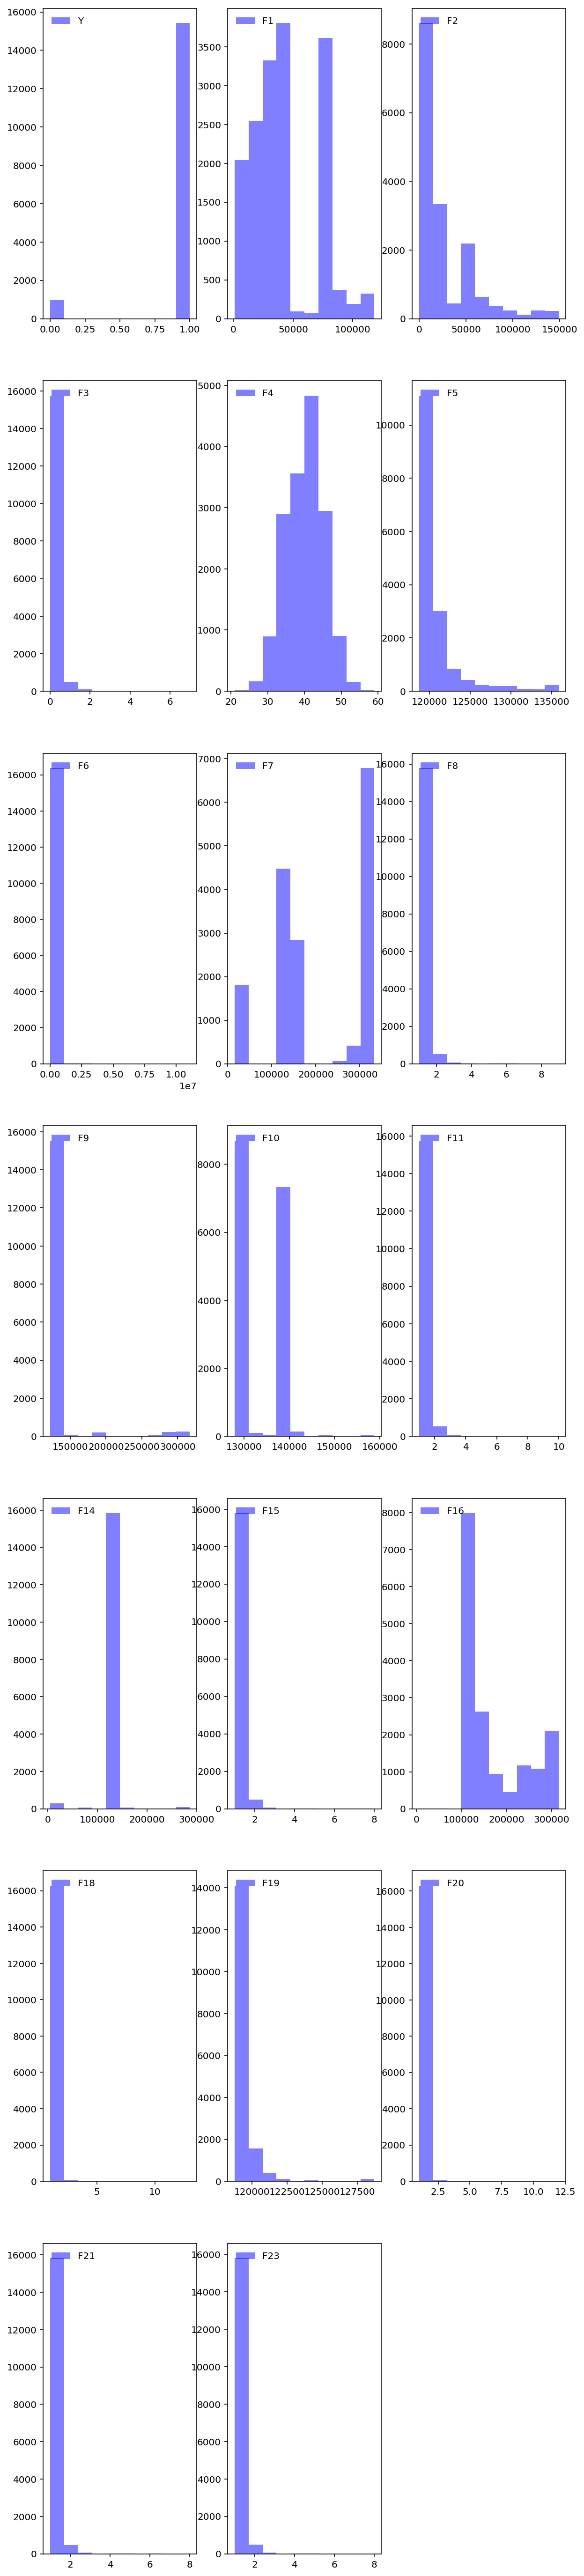

In [672]:
# Generically define how many plots along and across
ncols = 3
nrows = int(np.ceil(len(Etrainwin.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 50))

# Lazy counter so we can remove unwated axes
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(Etrainwin.columns):

            ax.hist(Etrainwin[Etrainwin.columns[counter]], bins=10, color='blue', alpha=0.5, label='{}'.format(Etrainwin.columns[counter]))
            #ax.set_xlabel('x')
            #ax.set_ylabel('PDF')
            #ax.set_ylim([0, 5])
            leg = ax.legend(loc='upper left')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

### NEURAL NET

In [296]:
nnx = pd.read_csv("train_final.csv", index_col=0)
nnx = nnx.drop(['F25', 'F26', 'F27'], axis=1)

nnx = nnx.drop(['F24', 'F13', 'F12', 'F17', 'F22'], axis=1)
nny = nnx['Y']
nnx = nnx.drop(['Y'], axis=1)

use testX, X_slimmed

In [304]:

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


In [306]:
# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [326]:
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=5, batch_size=32, verbose=0)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
# results = cross_val_score(estimator, X_slimmed, nny, cv=kfold)
# print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [327]:
estimator.fit(X_slimmed, nny, epochs=5, batch_size=32)


In [349]:
predict = estimator.predict_proba(testX, batch_size=32)[:,1]
print(predict.mean())
predict

0.829979


array([ 0.80970931,  0.85343647,  0.80937821, ...,  0.99233693,
        0.78463089,  0.80449909], dtype=float32)

In [358]:
model = Sequential()
model.add(Dense(64, input_dim=19, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [359]:
model.fit(X_slimmed, nny,
          epochs=20,
          batch_size=128, class_weight={0: 0.05, 1: 0.95})
#score = model.evaluate(x_test, y_test, batch_size=128)

Epoch 1/20
16383/16383 [==============================] - 2s 116us/step - loss: 0.0621 - acc: 0.9370
Epoch 2/20
16383/16383 [==============================] - 0s 27us/step - loss: 0.0249 - acc: 0.9415
Epoch 3/20
16383/16383 [==============================] - 0s 27us/step - loss: 0.0239 - acc: 0.9415
Epoch 4/20
16383/16383 [==============================] - 0s 28us/step - loss: 0.0232 - acc: 0.9415
Epoch 5/20
16383/16383 [==============================] - 0s 28us/step - loss: 0.0231 - acc: 0.9415
Epoch 6/20
16383/16383 [==============================] - 0s 30us/step - loss: 0.0225 - acc: 0.9415
Epoch 7/20
16383/16383 [==============================] - 0s 29us/step - loss: 0.0223 - acc: 0.9415
Epoch 8/20
16383/16383 [==============================] - 0s 28us/step - loss: 0.0223 - acc: 0.9415
Epoch 9/20
16383/16383 [==============================] - 0s 28us/step - loss: 0.0223 - acc: 0.9415
Epoch 10/20
16383/16383 [==============================] - 0s 28us/step - loss: 0.0218 - acc: 0.941

In [360]:
pre = model.predict_proba(testX, batch_size=32)
pre


array([[ 0.99305314],
       [ 0.99378598],
       [ 0.98961163],
       ..., 
       [ 0.99970347],
       [ 0.98535883],
       [ 0.98777676]], dtype=float32)

### try with some validation

In [415]:
nnx_train, nnx_test, nny_train, nny_test = train_test_split(X_slimmed, y, test_size=0.33, random_state=42)


In [490]:
model2 = Sequential()
model2.add(Dense(20, input_dim=19, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

opt = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)


#model2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [491]:
model2.fit(nnx_train, nny_train, epochs=80, batch_size=128, class_weight={0: 0.95, 1: 0.05})
#model2.fit(nnx_train, nny_train, epochs=20, batch_size=128)

Epoch 1/80
10976/10976 [==============================] - 2s 215us/step - loss: 0.0708 - acc: 0.4298
Epoch 2/80
10976/10976 [==============================] - 0s 29us/step - loss: 0.0700 - acc: 0.3897
Epoch 3/80
10976/10976 [==============================] - 0s 29us/step - loss: 0.0700 - acc: 0.3572
Epoch 4/80
10976/10976 [==============================] - 0s 29us/step - loss: 0.0698 - acc: 0.3470
Epoch 5/80
10976/10976 [==============================] - 0s 30us/step - loss: 0.0694 - acc: 0.3492
Epoch 6/80
10976/10976 [==============================] - 0s 29us/step - loss: 0.0690 - acc: 0.3512
Epoch 7/80
10976/10976 [==============================] - 0s 30us/step - loss: 0.0694 - acc: 0.3275
Epoch 8/80
10976/10976 [==============================] - 0s 31us/step - loss: 0.0687 - acc: 0.3460
Epoch 9/80
10976/10976 [==============================] - 0s 30us/step - loss: 0.0691 - acc: 0.4214
Epoch 10/80
10976/10976 [==============================] - 0s 30us/step - loss: 0.0685 - acc: 0.316

In [492]:
# test error
nny_prediction = model2.predict_proba(nnx_test, batch_size=128)
print (roc_auc_score(nny_test, nny_prediction))

0.57617884552


In [493]:
# training error
nny_trainpred = model2.predict_proba(nnx_train, batch_size=128)
print (roc_auc_score(nny_train, nny_trainpred))

0.69440950962


### make test


In [172]:
test_raw = pd.read_csv("test_final.csv", index_col=0)
#test_raw

In [173]:
testX = test_raw
testX_col = testX.columns
scaler = StandardScaler()
testX = scaler.fit_transform(testX)
testX = pd.DataFrame(testX, columns = testX_col)

# F25 = 1
# testX['ones'] = F25
# #testX

In [174]:
testX = testX.drop(['F24', 'F13', 'F12', 'F17', 'F22'], axis=1)

#testX = testX.drop(['F11'], axis=1)
#testX

In [90]:
pred = pd.DataFrame(pred, index = test_raw.index, columns = ['Y'])
pred
pred.to_csv('test01.csv')
# pred = pd.DataFrame(pred, index = test_raw.index)
# pred